# Teste Datasprints - NY taxi trips
#### Daniel Gomes Benjamim Rodrigues
17/01/2020

Importando bibliotecas e ferramentas necessárias:

In [1]:
import csv, json, sys
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import urllib 
%matplotlib inline

Definindo uma função para a leitura dos arquivos json, os quais estão armazenados no console S3 da AWS, e a conversão em um dataframe do pandas.

In [2]:
def creating_pandas(ano):
    data = {} 
    dict1 = {}
    file = urllib.request.urlopen('https://s3-sa-east-1.amazonaws.com/datasprints.test/data-'+ ano +'.json')
    for line in file:  
        dict1.update(json.loads(line.decode('utf-8')))
        if len(data.keys()) == 0:
            for element in dict1.keys():
                data[element] = []
        else:
            for element in dict1.keys():
                data[element].append(dict1[element])            
    data = pd.DataFrame(data)
    data['ano'] = ano
    return data    
        

Aplica-se a função para cada um dos arquivos json e cria-se um dataframe para cada ano tratado.

In [3]:
data_2009 = creating_pandas('2009')
data_2010 = creating_pandas('2010')
data_2011 = creating_pandas('2011')
data_2012 = creating_pandas('2012') 

Cria-se um dataframe que é o conjunto dos quatro.

In [4]:
df = pd.concat([data_2009, data_2010], ignore_index = True)

df = pd.concat([df, data_2011], ignore_index = True)

df = pd.concat([df, data_2012], ignore_index = True)

df


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount,ano
0,CMT,2009-01-13T07:40:07.639754+00:00,2009-01-13T07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,None,NaN,-73.940449,40.792385,Cash,15.4,0.0,0.0,0.0,15.4,2009
1,VTS,2009-01-06T19:30:44.142187+00:00,2009-01-06T19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,None,NaN,-73.944535,40.768108,CASH,6.1,1.0,0.0,0.0,7.1,2009
2,VTS,2009-09-24T08:28:09.004451+00:00,2009-09-24T08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,None,NaN,-73.958122,40.721812,CASH,12.9,0.5,0.0,0.0,13.4,2009
3,VTS,2009-10-29T05:50:39.214629+00:00,2009-10-29T05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,None,NaN,-73.979757,40.776075,CASH,7.7,0.5,0.0,0.0,8.2,2009
4,VTS,2009-10-23T17:14:45.661393+00:00,2009-10-23T17:23:51.913687+00:00,1,1.15,-73.994665,40.750528,None,NaN,-73.978623,40.750478,CASH,6.5,0.0,0.0,0.0,6.5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999991,CMT,2012-07-02T02:16:07.72331+00:00,2012-07-02T02:24:36.05472+00:00,3,6.30,-73.947063,40.784441,None,NaN,-73.987610,40.738477,Cash,19.4,0.0,0.0,0.0,19.4,2012
3999992,CMT,2012-04-11T16:24:49.255035+00:00,2012-04-11T16:30:46.179091+00:00,1,1.80,0.000000,0.000000,None,NaN,0.000000,0.000000,Cash,7.4,0.0,0.0,0.0,7.4,2012
3999993,CMT,2012-09-15T15:00:58.80813+00:00,2012-09-15T15:08:10.313917+00:00,4,2.90,-74.006156,40.743763,None,NaN,-73.974005,40.764069,Cash,10.6,0.0,0.0,0.0,10.6,2012
3999994,CMT,2012-06-25T09:17:36.81712+00:00,2012-06-25T09:31:07.322351+00:00,2,1.70,-73.979615,40.783816,None,NaN,-73.988470,40.764176,Credit,7.4,0.0,2.0,0.0,9.4,2012


Deve-se tratar os dados para a retirada dos valores nulos ou que não fazem sentido para aquele feature. Portanto:

In [5]:
df = df[(df['trip_distance'] != 0.0)][(df['pickup_latitude']>1)][(df['dropoff_latitude'] > 1)][(df['fare_amount'] != 0.0)]

print('O dataframe tratado possui ' + str(len(df)) + ' linhas.')
print('A quantidade de valores nulos em cada coluna do dataframe é:\n\n' + str(df.isnull().sum()))

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


O dataframe tratado possui 3903856 linhas.
A quantidade de valores nulos em cada coluna do dataframe é:

vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
rate_code             3903856
store_and_fwd_flag    3903856
dropoff_longitude           0
dropoff_latitude            0
payment_type                0
fare_amount                 0
surcharge                   0
tip_amount                  0
tolls_amount                0
total_amount                0
ano                         0
dtype: int64


Duas colunas possuem apenas valores nulos. Logo, são descartáveis.

In [6]:
df = df.drop(['rate_code', 'store_and_fwd_flag'], axis = 1)

Respondendo a primeira questão dos requisitos mínimos do teste, temos que:

In [34]:
print('1) A distância média percorrida pelas viagens feita com um máximo de 2 passageiros é de: ' + str(round(df[df['passenger_count'] < 3]['trip_distance'].mean(), 2)) + '.')

1) A distância média percorrida pelas viagens feita com um máximo de 2 passageiros é de: 2.69.


Analisando os possíveis valores das colunas 'vendor_id' e 'payment_type', percebemos duas particularidades: para os 4 anos, as empresas que mais aparecem são três: CMT, VTS e DDS; há dois valores que correspondem ao pagamento em dinheiro, sua tradução ao inglês em caixa alta, CASH, e com apenas a primeira letra em caixa alta, Cash.

In [35]:
display(df['vendor_id'].value_counts())
df['payment_type'].value_counts()

CMT    1856004
VTS    1799436
DDS     248412
TS           4
Name: vendor_id, dtype: int64

CASH         1660088
Cash         1511152
Credit        682592
CREDIT         38628
No Charge       9464
Dispute         1932
Name: payment_type, dtype: int64

Respondendo a segunda questão dos requisitos mínimos:

In [36]:
print('The total amount of money raised by CMT is: R$ ' + str(round(sum(df[df['vendor_id'] == 'CMT']['total_amount']), 2)))
print('The total amount of money raised by VTS is: R$ ' + str(round(sum(df[df['vendor_id'] == 'VTS']['total_amount']), 2)))
print('The total amount of money raised by DDS is: R$ ' + str(round(sum(df[df['vendor_id'] == 'DDS']['total_amount']), 2)))
print('\n')
print('2) A ordem dos maiores fornecedores de acordo com o total de dinheiro arrecado é, do maior para o menor: CMT, VTS e DDS.')

The total amount of money raised by CMT is: R$ 18832560.8
The total amount of money raised by VTS is: R$ 18519064.56
The total amount of money raised by DDS is: R$ 2670756.0


2) A ordem dos maiores fornecedores de acordo com o total de dinheiro arrecado é, do maior para o menor: CMT, VTS e DDS.


Para responder a terceira questão, deve-se converter o tipo de variável dos valores das colunas que representam dias e horários.

In [9]:
df['pickup_datetime'] = df['pickup_datetime'].astype('datetime64')
df['dropoff_datetime'] = df['dropoff_datetime'].astype('datetime64')

E é preciso ataulizar os dataframes de cada ano.

In [10]:
data_2009 = df[df['ano'] == '2009']
data_2010 = df[df['ano'] == '2010']
data_2011 = df[df['ano'] == '2011']
data_2012 = df[df['ano'] == '2012'] 

Agora, é possível plotar um histograma de distribuição de 4 anos das viagens pagas com dinheiro:

3)


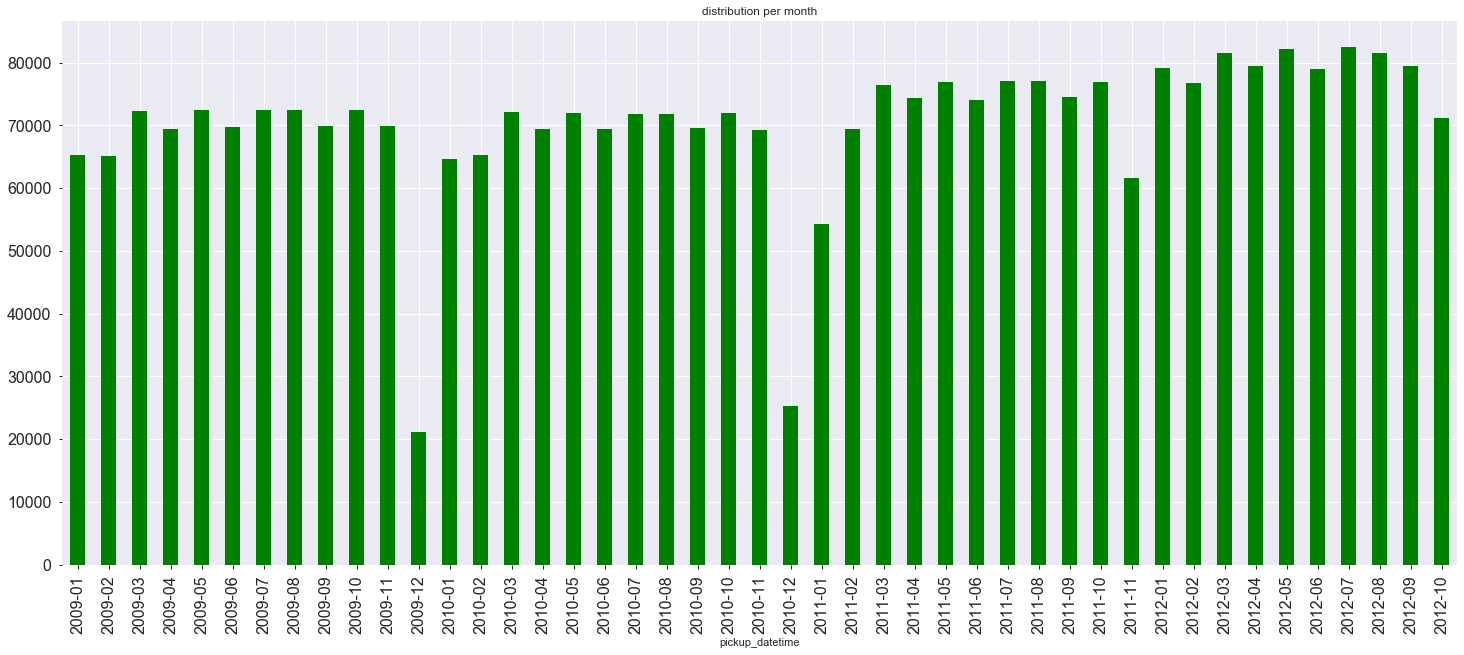

In [38]:
print('3)')
df[(df['payment_type'] == 'Cash') | (df['payment_type'] == 'CASH')]['vendor_id'].groupby(df["pickup_datetime"].dt.to_period('M')).count().plot(kind="bar", figsize=(25,10), color = 'green', title = 'distribution per month', fontsize = 16)

Para responder à quarta questão, foi criado um dataframe contendo a soma das gorjetas das viagens para cada dia dos últimos 3 meses que aparecem no arquivo json do ano de 2012. O arquivo só tem dados que vão até o dia 27 do mês de outubro. Logo, o dataframe vai do dia primeiro do mês de agosto até o dia 27 do mês de outubro.

In [45]:
from datetime import timedelta, date

tips_by_day = pd.DataFrame(columns = ['tips_sum','day'])

for n in range(int((date(2012,10,28) - date(2012,8,1)).days)):
    tips_by_day.loc[n,'day'] = date(2012,8,1) + timedelta(n)
    tips_by_day.loc[n,'tips_sum'] = data_2012[(data_2012['tip_amount'] > 0) & (data_2012['pickup_datetime'].astype('str').str.contains(str(tips_by_day.loc[n,'day'])))]['tip_amount'].sum()

tips_by_day

,tips_sum,day
0,1205.18,2012-08-01
1,1399.9,2012-08-02
2,1284.63,2012-08-03
3,1265.02,2012-08-04
4,1260.06,2012-08-05
5,1245.45,2012-08-06
6,1430.8,2012-08-07
7,1275.16,2012-08-08
8,1289.17,2012-08-09
9,1268.69,2012-08-10


Agora, plota-se o dataframe criado e obtem-se um gráfico de serie temporal que apresenta a soma das gorjetas oferecidas nas viagens de cada um dos dias dos meses de agosto, setembro e outubro do ano de 2012.

4)


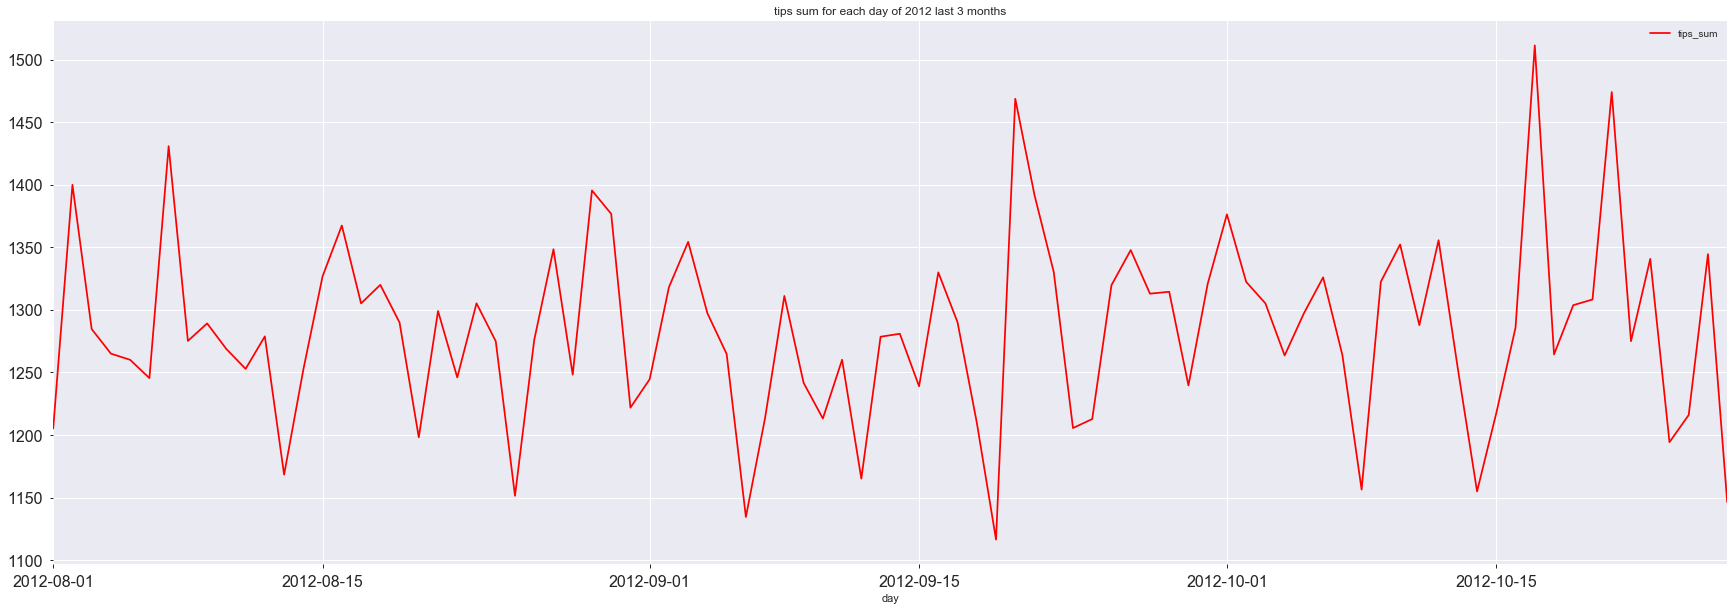

In [111]:
print('4)')

tips_by_day.set_index('day', inplace = True)

tips_by_day.plot(kind="line", figsize=(30,10), color = 'red', title = 'tips sum for each day of 2012 last 3 months', fontsize = 16)

Já para os itens bônus, em relação ao primeiro item, faz-se o seguinte:

In [47]:
saturday_count = 0
sunday_count = 0
saturday_sum = 0
sunday_sum = 0

for i in df.index:
    
    if df.loc[i,'pickup_datetime'].weekday() == 0:
        sunday_count += 1
        sunday_sum += (df.loc[i,'dropoff_datetime'].timestamp() - df.loc[i,'pickup_datetime'].timestamp())/60
        
    if df.loc[i,'pickup_datetime'].weekday() == 6:
        saturday_count += 1
        saturday_sum += (df.loc[i,'dropoff_datetime'].timestamp() - df.loc[i,'pickup_datetime'].timestamp())/60

In [48]:
sat = str(saturday_sum/saturday_count)
sun = str(sunday_sum/sunday_count)
wk = str((saturday_sum + sunday_sum)/(saturday_count + sunday_count))

print('Average saturdays time trip is: ' + sat[0] + ' minutes and ' + str(round(float('0' + sat[1:])*60)) + ' seconds')
print('Average sundays time trip is: ' + sun[0] + ' minutes and ' + str(round(float('0' + sun[1:])*60)) + ' seconds')
print('Average weekends time trip is: ' + wk[0] + ' minutes and ' + str(round(float('0' + wk[1:])*60)) + ' seconds')

Average saturdays time trip is: 8 minutes and 45 seconds
Average sundays time trip is: 8 minutes and 45 seconds
Average weekends time trip is: 8 minutes and 45 seconds


* Logo, conclui-se que, tanto para sábado quanto para domingo, a média de tempo de viagem é de 8 minutos e 45 segundos.

Para o segundo item dos itens bônus, basta analisar o histograma criado para a terceira questão dos requisitos mínimos: 
* É possível perceber que, para os 3 anos, no mês de novembro ocorre uma redução da quantidade de viagens em relação ao mês de outubro. 


* Sabendo-se que não há dados nos arquivos json para o mês de dezembro dos anos de 2011 e 2012, ainda assim é possível perceber uma tendência de queda drástica no número de viagens neste mês em comparação aos outros meses.


* Ainda assim, para evidenciar isso com mais um gráfico, foi criado um dataframe com o tempo de viagem total somado para cada mês, com o intuito de plotá-lo e prover mais uma análise.

In [11]:
from datetime import timedelta, date

time_trips = pd.DataFrame(columns = ['time_trip_sum','month'])

m = 1
c = 2009
for n in range(1,48):
    if m <10:
        time_trips.loc[n,'month'] = str(c) + '-0' + str(m)
    if m > 9:
        time_trips.loc[n,'month'] = str(c) + '-' + str(m)
    if m > 12:
        c +=1
        m = n - 12*(c-2009)
        time_trips.loc[n,'month'] = str(c) +'-0' + str(m) 
    temp = df[(df['pickup_datetime'].astype('str').str.contains(str(time_trips.loc[n,'month'])))]
    if len(temp) != 0:
        time_trips.loc[n,'time_trip_sum'] = (temp['dropoff_datetime'] - temp['pickup_datetime']).sum().total_seconds()/3600
    m += 1
time_trips

,time_trip_sum,month
1,12056.2,2009-01
2,12046,2009-02
3,13386.3,2009-03
4,12834.5,2009-04
5,13344.9,2009-05
6,12878.7,2009-06
7,13352.3,2009-07
8,13353.3,2009-08
9,12938.6,2009-09
10,13355.2,2009-10


Com o dataframe criado, plota-se o gráfico e nota-se novamente a mesma característica de sazonalidade:

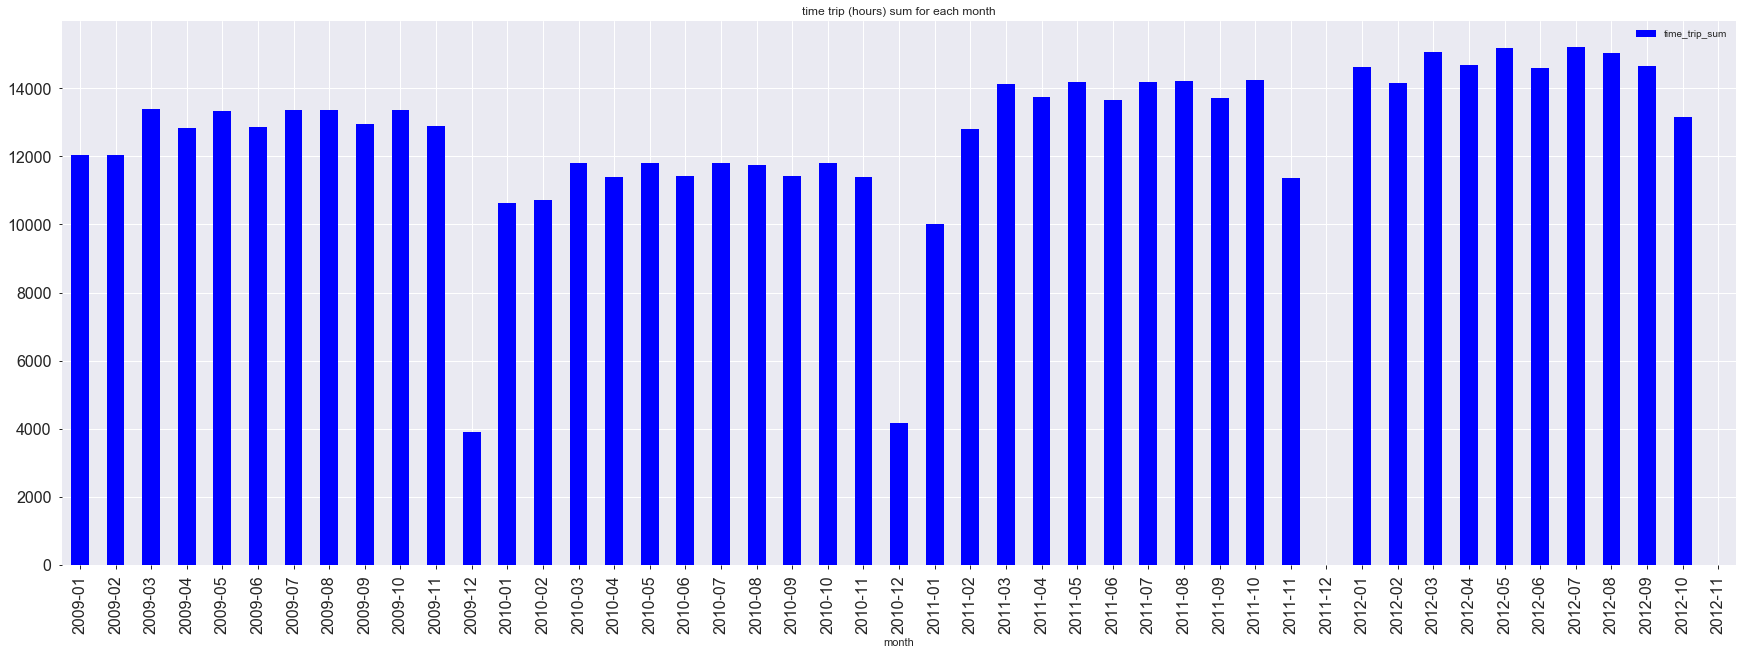

In [107]:
time_trips.set_index('month', inplace = True)

time_trips.plot(kind="bar", figsize=(30,10), color = 'blue', title = 'time trip (hours) sum for each month', fontsize = 16)